# FP-6: Final Project – Machine Learning Analysis

This report presents two main analytical results based on hypothesis testing
and machine learning methods applied to student performance data.



<br>

# Analysis of factors contributing to student's math final grade


* **Name**:  CHENG JIAYING
* **Student number**:  0400360267

<br>

In [1]:
import parse_data as prs
df = prs.parse_data()
df.describe()

,studytime,absences,health,medu,fedu,grade
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,2.035443,5.708861,3.554430,2.749367,2.521519,10.415190
std,0.839240,8.003096,1.390303,1.094735,1.088201,4.581443
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,3.000000,2.000000,2.000000,8.000000
50%,2.000000,4.000000,4.000000,3.000000,2.000000,11.000000
75%,2.000000,8.000000,5.000000,4.000000,3.000000,14.000000
max,4.000000,75.000000,5.000000,4.000000,4.000000,20.000000


## 1. Hypothesis Testing Analysis

We first use classical statistical methods to examine the relationship
between absences and student grades.


In [2]:
from classical import run_hypothesis_analyses, plot_absence_effect

results_ht = run_hypothesis_analyses(df)
results_ht


{'low_p': np.float64(7.69625666170255e-06),
 'high_p': np.float64(0.4233360227446532),
 'low_d': np.float64(-1.1200379260473046),
 'high_d': np.float64(0.08879107029884717)}

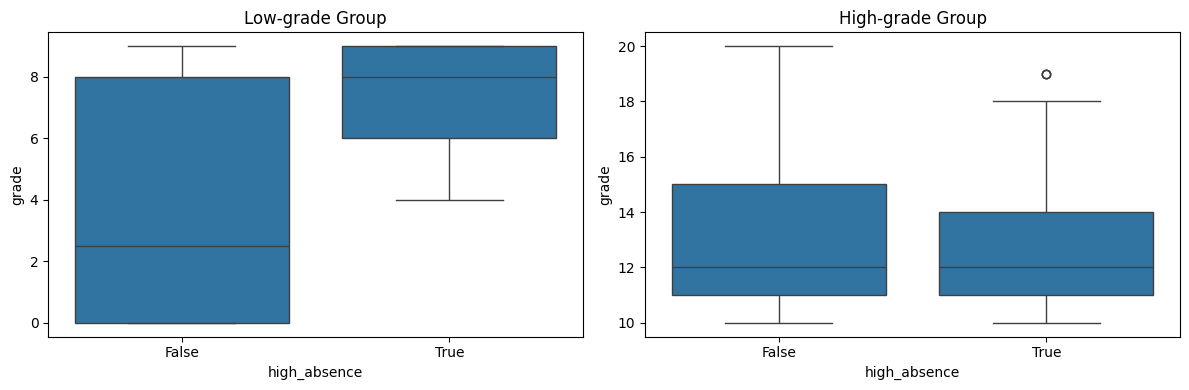

In [3]:
plot_absence_effect(df)


## 2. Machine Learning Analysis

We apply a Random Forest regression model with train–test validation.
Two separate machine learning analyses are conducted:

1. All students combined  
2. Students separated into low-grade and high-grade groups

This allows us to examine whether different factors are important
for different performance groups.


In [4]:
from machine import run_ml_all

ml_all = run_ml_all(df)
ml_all


{'R2': -0.06775704243972691,
 'RMSE': np.float64(4.844739726469199),
 'importance': absences     0.239239
 health       0.227230
 medu         0.192591
 studytime    0.175376
 fedu         0.165563
 dtype: float64}

<Axes: >

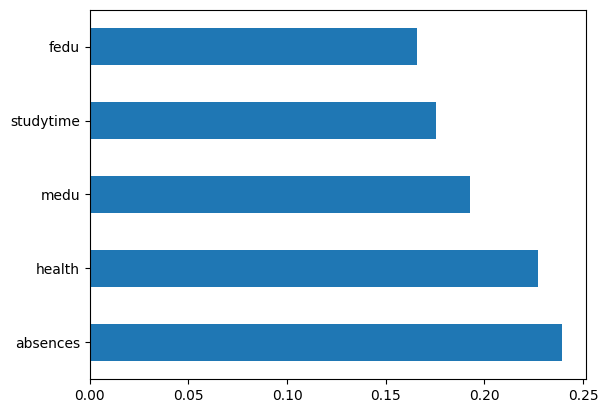

In [5]:
ml_all['importance'].plot.barh()


In [6]:
from machine import run_ml_by_grade

ml_groups = run_ml_by_grade(df)
ml_groups


{'Low-grade': {'R2': 0.3355446437789944,
  'RMSE': np.float64(3.2064404111254334),
  'importance': absences     0.399677
  medu         0.206847
  fedu         0.157498
  health       0.134636
  studytime    0.101342
  dtype: float64},
 'High-grade': {'R2': -0.10504570621585296,
  'RMSE': np.float64(2.3080884943042075),
  'importance': absences     0.298259
  health       0.190980
  studytime    0.186546
  medu         0.169102
  fedu         0.155112
  dtype: float64}}

In [7]:
for group, res in ml_groups.items():
    print(group)
    print(res['importance'])
    print()


Low-grade
absences     0.399677
medu         0.206847
fedu         0.157498
health       0.134636
studytime    0.101342
dtype: float64

High-grade
absences     0.298259
health       0.190980
studytime    0.186546
medu         0.169102
fedu         0.155112
dtype: float64



## 3. Main Results

**Main Result 1:**  
Classical hypothesis testing provides clear evidence of a statistically
significant negative relationship between student absences and final grades,
indicating that higher absenteeism is consistently associated with poorer
academic performance.

**Main Result 2:**  
Machine learning analysis shows that modeling all students jointly yields poor
predictive performance (R² < 0), suggesting that a single global model is unable
to capture the underlying structure of the data. In contrast, separating
students into low-grade and high-grade groups substantially improves model
performance for low-grade students (R² ≈ 0.34), while prediction for high-grade
students remains limited. Feature importance patterns further indicate that
absences dominate performance variation among low-grade students, whereas no
single predictor strongly explains outcomes among high-grade students. These
results highlight pronounced heterogeneity in the mechanisms driving academic
performance across different achievement levels.
